In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import os

# List of attack types and BENIGN
attack_types = ["Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator",
                "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack - Brute Force",
                "Web Attack - Sql Injection", "Web Attack - XSS"]
benign_type = "BENIGN"

# Function for feature selection and importance list creation
def perform_feature_selection(data):
    X = data.drop(columns=["Label"])
    y = data["Label"].apply(lambda x: 1 if x != benign_type else 0)
    
    clf = RandomForestRegressor(n_estimators=100, random_state=42)
    clf.fit(X, y)
    
    importances = clf.feature_importances_
    return importances

# Iterate over attack types
for attack_type in attack_types:
    # Load the attack vs. benign file
    input_filename = f"{attack_type}_vs_{benign_type}.csv"
    attack_data = pd.read_csv(input_filename, low_memory=False)
    
    # Perform feature selection
    importances = perform_feature_selection(attack_data)
    
    # Create a DataFrame for importance list
    importance_df = pd.DataFrame({"Feature": attack_data.drop(columns=["Label"]).columns,
                                  "Importance": importances})
    
    # Calculate the percentage of importance for each feature
    total_importance = importance_df["Importance"].sum()
    importance_df["Percentage"] = importance_df["Importance"] / total_importance * 100
    
    # Sort the DataFrame by importance in descending order
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    
    # Print the top 20 features and their percentages
    print(f"\nTop 20 features and their percentages for {attack_type}:")
    print(importance_df.head(20))
    
    # Save the importance list to a CSV file
    importance_filename = f"{attack_type}_importance.csv"
    importance_df.to_csv(importance_filename, index=False)
    print(f"Saved importance list for {attack_type}")
    
    # Create a bar plot for the top 20 features' importances
    plt.figure(figsize=(10, 6))
    top_20_df = importance_df.head(20)
    top_20_df.plot(kind="bar", x="Feature", y="Importance", legend=None)
    plt.title(f"Feature Importance for {attack_type}")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("Feature selection and visualization completed for all attack types.")


FileNotFoundError: [Errno 2] No such file or directory: 'Bot_vs_BENIGN.csv'


Top 20 features and their percentages for combined_data:
                         Feature  Importance  Percentage
1                      Source IP    0.068513    6.851274
10   Total Length of Fwd Packets    0.064053    6.405332
73       Init_Win_bytes_backward    0.056881    5.688145
69             Subflow Fwd Bytes    0.049518    4.951833
11   Total Length of Bwd Packets    0.038880    3.888046
0                        Flow ID    0.037963    3.796347
48        Packet Length Variance    0.037197    3.719695
6                      Timestamp    0.029242    2.924230
71             Subflow Bwd Bytes    0.028161    2.816116
3                 Destination IP    0.027629    2.762920
43                 Bwd Packets/s    0.026704    2.670368
58           Average Packet Size    0.021796    2.179571
4               Destination Port    0.020716    2.071648
18        Bwd Packet Length Mean    0.018630    1.863018
60          Avg Bwd Segment Size    0.017693    1.769252
68           Subflow Fwd Packe

<Figure size 1000x600 with 0 Axes>

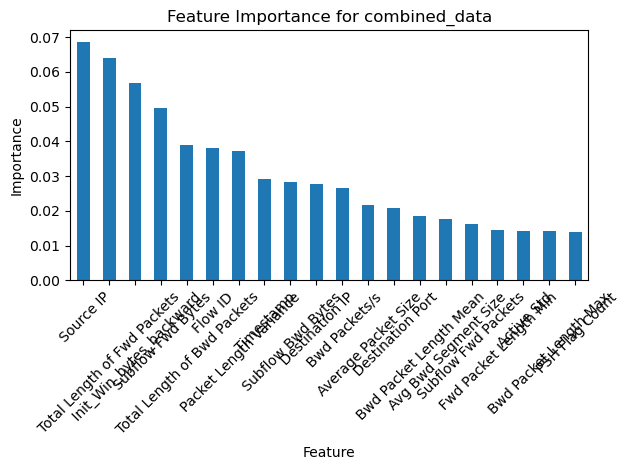

In [ ]:
combined_data = pd.read_csv("combined_data.csv")
def perform_feature_selection(data):
    X = data.drop(columns=[" Label"])
    y = data[" Label"].apply(lambda x: 1 if x != "BENIGN" else 0)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    
    feature_importances = clf.feature_importances_
    return feature_importances
# Perform feature selection on the combined_data file
importance_list = perform_feature_selection(combined_data)

# Create a DataFrame for importance list
importance_df = pd.DataFrame({"Feature": combined_data.drop(columns=[" Label"]).columns,
                              "Importance": importance_list})

# Calculate the percentage of importance for each feature
total_importance = importance_df["Importance"].sum()
importance_df["Percentage"] = importance_df["Importance"] / total_importance * 100

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print the top 20 features and their percentages
print("\nTop 20 features and their percentages for combined_data:")
print(importance_df.head(20))

# Save the importance list to a CSV file
importance_filename = "combined_data_importance.csv"
importance_df.to_csv(importance_filename, index=False)
print("Saved importance list for combined_data")

# Create a bar plot for the top 20 features' importances
plt.figure(figsize=(10, 6))
top_20_df = importance_df.head(20)
top_20_df.plot(kind="bar", x="Feature", y="Importance", legend=None)
plt.title("Feature Importance for combined_data")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


